# Presentación

## Introducción

**TUIA - Procesamiento del Lenguaje Natural** - 2023

---

**Trabajo Práctico Nº 1:**

*   "*Procesamiento del Lenguaje*"


**Alumnos:**  

*   Timoteo García
*   Claudia Leguiza
*   Miguel Mussi

## Consignas

### Ejercicio 1

Construir un dataset haciendo web scraping de páginas web de su elección.

* Definir 4 categorías de noticias/artículos.
* Para cada categoría, extraer los siguientes datos de 10 noticias diferentes:
  * url (sitio web donde se publicó el artículo)
  * título (título del artículo)
  * texto (contenido del artículo)

**Recomendaciones**: elegir blogs para evitar los límites de lectura para los medios que exigen suscripción. Investigue sobre el archivo robots.txt y téngalo en cuenta. Considere también espaciar las consultas para evitar saturar el sitio.

Utilizando los datos obtenidos construya el dataset en formato csv.

### Ejercicio 2

Utilizando los datos de título y categoría del dataset del ejercicio anterior, entrenar un modelo de clasificación de noticias en categorías específicas.

### Ejercicio 3

Para cada categoría, realizar las siguientes tareas:
* Procesar el texto mediante recursos de normalización y limpieza.
* Con el resultado anterior, realizar conteo de palabras y mostrar la importancia de las mismas mediante una nube de palabras.

Escribir un análisis general del resultado obtenido.

### Ejercicio 4

Use los modelos de embedding propuestos sobre el final de la Unidad 2 para evaluar la similitud entre los títulos de las noticias de una de las categorías.

Reflexione sobre las limitaciones del modelo en base a los resultados obtenidos, en contraposición a los resultados que hubiera esperado obtener.

### Ejercicio 5

Escriba un programa interactivo que, según la categoría seleccionada por el usuario, devuelva un resumen de las noticias incluidas en ella.

Justifique la elección del modelo usado para tal fin.

**Opcional:** Investigar y programar un bot de Telegram que entregue un resumen de noticias del blog de su elección.

Recomendamos el uso de pyTelegramBotAPI.

# Desarrollo del TP

## Dependecias

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import unicodedata
import nltk
import sklearn as skl
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

## Ejercicio 1. Web Scraping

### Categorías

El scraping de los textos se realiza sobre el portal de noticias [Clarin](https://www.clarin.com). En particular, en las secciones correspondientes a:

*   Economía
*   Política
*   Sociedad
*   Deportes

Para este trabajo se extraen diez (10) artículos de cada categoría y se procesan con las herramientas provistas por la cátedra.

**NOTA**: Los primeros bloques de código que corresponden al web scraping, la confección del dataframe y la generación del archivo csv **SE EJECUTAN UNA SOLA VEZ**, por lo que pueden aparecer comentados en el proyecto. A partir de allí, el resto del trabajo se realiza sobre la carga y procesamiento de esos mismos datos.

In [ ]:
# temas = ['economia', 'politica', 'sociedad', 'deportes']
# tema_data = []
# titulo_data = []
# enlace_data = []
# texto_data = []

### Scraping

Se realiza el parseo del contenido deseado según las etiquetas html del sitio.

In [ ]:
# for tema in temas:
#   url = f"https://www.clarin.com/{tema}/"

#   # Realiza una solicitud GET al sitio web
#   response = requests.get(url)

#   if response.status_code == 200:
#       # Parsea el contenido de la página web con BeautifulSoup
#       soup = BeautifulSoup(response.text, 'html.parser')

#       # Encuentra los elementos HTML que contienen las noticias
#       noticias = soup.find_all('article', class_='sc-cee0645a-0 bfZwTf')

#       # Itera a través de las noticias y muestra el título y el enlace
#       for noticia in noticias[:10]:
#           titulo = noticia.find('a')['aria-label']
#           enlace = noticia.find('a')['href']
#           articulo = url + enlace
#           noticia_response = requests.get(articulo)
#           if noticia_response.status_code == 200:
#               # Parsea el contenido de la noticia
#               noticia_soup = BeautifulSoup(noticia_response.text, 'html.parser')

#               # Encuentra el elemento HTML que contiene el texto del artículo
#               parrafos = noticia_soup.find_all('div', class_='sc-851b591c-0 cCYlYU container-text')

#               texto_articulo = "\n".join(parrafo.get_text() for parrafo in parrafos)

#           else:
#               print(f'Error al obtener la noticia: {noticia_response.status_code}')
#           tema_data.append(tema)
#           titulo_data.append(titulo)
#           enlace_data.append(articulo)
#           texto_data.append(texto_articulo)
#           # Agrega un temporizador de 5 segundos
#           time.sleep(5)

#   else:
#       print(f'Error al obtener la página: {response.status_code}')

### DataFrame

In [ ]:
# data = {'Tema': tema_data , 'Título': titulo_data , 'Enlace': enlace_data, 'Noticia': texto_data}
# df = pd.DataFrame(data)

In [ ]:
# Mostrar el DataFrame
# df.shape

In [ ]:
# df.to_csv('noticias_clarin.csv', index=False)

### Carga de archivo

In [2]:
noticias = pd.read_csv('noticias_clarin.csv')
noticias.sample(5)

,Tema,Título,Enlace,Noticia
12,politica,Dato clave: qué pasará con los bloques de Junt...,https://www.clarin.com/politica//politica/dato...,Las réplicas del temblor que significó la derr...
24,sociedad,"Italia, otro destino muy elegido por quienes s...",https://www.clarin.com/sociedad//sociedad/ital...,Muchos de los argentinos que emigran a Italia ...
6,economia,Jubilaciones: esta semana se conocerá el aumen...,https://www.clarin.com/economia//economia/jubi...,"Antes del viernes 10, el ministro Sergio Massa..."
29,sociedad,"La noche de los Cimientos: bajo el lema ""Jóven...",https://www.clarin.com/sociedad//sociedad/noch...,"Fundación Cimientos, una organización sin fine..."
31,deportes,Dibu Martínez estrenó su premio Lev Yashin con...,https://www.clarin.com/deportes//deportes/dibu...,"Este lunes, Dibu Martínez fue galardonado por ..."


In [3]:
noticias['Tema'].value_counts()

economia    10
politica    10
sociedad    10
deportes    10
Name: Tema, dtype: int64

In [4]:
noticias.describe()

,Tema,Título,Enlace,Noticia
count,40,40,40,40
unique,4,40,40,40
top,economia,Feriado bancario: qué operaciones no se podrán...,https://www.clarin.com/economia//economia/feri...,Este lunes 6 de noviembre no abrirá ninguna de...
freq,10,1,1,1


In [5]:
noticias.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [6]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tema     40 non-null     object
 1   Título   40 non-null     object
 2   Enlace   40 non-null     object
 3   Noticia  40 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


## Procesamiento de texto

### Limpieza del dataset

Conversión a minúsculas

In [7]:
# Cambia los nombres de las columnas a minúsculas
noticias.rename(
    columns={col: col.lower() for col in noticias.columns},
    inplace=True
)
#Cambia la letras del contenido de las columnas a minusculas
noticias['título'] = noticias['título'].str.lower()
noticias['noticia'] = noticias['noticia'].str.lower()


In [8]:
noticias.sample(5)

,tema,título,enlace,noticia
31,deportes,dibu martínez estrenó su premio lev yashin con...,https://www.clarin.com/deportes//deportes/dibu...,"este lunes, dibu martínez fue galardonado por ..."
9,economia,el hijo de cavallo es experto en medición de p...,https://www.clarin.com/economia//economia/el-h...,"de perfil bajísimo, el economista alberto cava..."
15,politica,alerta en la cúpula de la iglesia por el apoyo...,https://www.clarin.com/politica//politica/aler...,la irrupción de javier milei en la política co...
37,deportes,"vélez vs talleres de córdoba, por la copa de l...",https://www.clarin.com/deportes//deportes/vele...,"vélez sarsfield, que lucha por evitar el desce..."
22,sociedad,un avión de aerolíneas argentinas tuvo un desp...,https://www.clarin.com/sociedad//sociedad/avio...,un avión de aerolíneas argentinas que iba desd...


Eliminación de espacios en blanco

In [9]:
# Quita espacios en blanco
noticias = noticias.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

Eliminación de acentos

In [10]:
# Función de eliminación de acentos
def remueve_acentos(texto):
    nfkd_form = unicodedata.normalize('NFKD', texto)
    return''.join([letra for letra in nfkd_form if not unicodedata.combining(letra)])

In [11]:
# Itera sobre dataframe y llama a la funcion para eliminar acentos
for fila in noticias.index:
  for columna in noticias.columns:
    texto = noticias.loc[fila,columna]
    noticias.loc[fila,columna] = (remueve_acentos(texto))

Eliminación de puntuación

In [12]:
# Elimina caracteres de puntuación
noticias['título'] = noticias['título'].str.replace('[^\w\s]', '', regex = True)
noticias['noticia'] = noticias['noticia'].str.replace('[^\w\s]', '', regex = True)

## Ejercicio 2. Modelo de clasificación

In [13]:
X = noticias['título']
y = noticias['tema']

In [14]:
X = [' '.join(title) if isinstance(title, list) else title for title in X]

In [15]:
X

['feriado bancario que operaciones no se podran hacer este lunes',
 'euro hoy a cuanto cotiza este domingo 05 de noviembre',
 'dolar blue hoy a cuanto cotiza este domingo 05 de noviembre',
 'israel debe destruir a hamas para sobrevivir',
 'el lado oscuro del plan platita la inflacion que esta escondiendo massa',
 'santos uribelarrea una infancia en el palacio duhau y una formula para crecer del campo a las energia renovables',
 'jubilaciones esta semana se conocera el aumento de diciembre y la clave pasa por el alcance y el valor de los bonos',
 'seis datos de la herencia economica que anticipan cambios en el dolar',
 'un funcionario de sergio massa adelanto que se esta analizando bajar retenciones al campo',
 'el hijo de cavallo es experto en medicion de precios y opina que el metodo de inflacion semanal de massa es enganoso',
 'marcha libertaria contra sergio massa en el obelisco',
 'la justicia demora la detencion de los jefes massistas de chocolate y sospechan que es por el balotaj

In [16]:
steps = [
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
]

pipeline = Pipeline(steps)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [17]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.625
              precision    recall  f1-score   support

    deportes       0.33      1.00      0.50         1
    economia       0.50      1.00      0.67         1
    politica       1.00      0.75      0.86         4
    sociedad       0.00      0.00      0.00         2

    accuracy                           0.62         8
   macro avg       0.46      0.69      0.51         8
weighted avg       0.60      0.62      0.57         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
noticias_nuevas = ["¿Es obligatorio votar en el balotaje de las elecciones 2023 en Argentina?",
                   "El mensaje de Edinson Cavani para los hinchas de Boca tras perder la final de la Libertadores",
                   "Cinco dirigentes piqueteros irán a juicio por cortar calles en Córdoba durante una protesta",
                   "Con una fuerte impronta política, miles de personas se dieron cita en la XXXII Marcha del Orgullo",
                   "Los 4 motivos por los que el dólar libre bajó por quinto día consecutivo y se aleja del récord",
                   "Con un golazo de Pratto, Defensa y Justicia iguala 1-1 con Racing por la Copa de la Liga"]

In [19]:
for noticia in noticias_nuevas:
    categoria = pipeline.predict([noticia])
    print(f"La noticia '{noticia}' es de la categoría: {categoria[0]}.")

La noticia '¿Es obligatorio votar en el balotaje de las elecciones 2023 en Argentina?' es de la categoría: economia.
La noticia 'El mensaje de Edinson Cavani para los hinchas de Boca tras perder la final de la Libertadores' es de la categoría: deportes.
La noticia 'Cinco dirigentes piqueteros irán a juicio por cortar calles en Córdoba durante una protesta' es de la categoría: economia.
La noticia 'Con una fuerte impronta política, miles de personas se dieron cita en la XXXII Marcha del Orgullo' es de la categoría: sociedad.
La noticia 'Los 4 motivos por los que el dólar libre bajó por quinto día consecutivo y se aleja del récord' es de la categoría: economia.
La noticia 'Con un golazo de Pratto, Defensa y Justicia iguala 1-1 con Racing por la Copa de la Liga' es de la categoría: deportes.


## Ejercicio 3. Normalización y limpieza

### Normalizacion y tokenizacion de los datos

In [20]:
texto_normalizado = noticias.copy()

In [21]:
# Descarga el conjunto de palabras de parada en español
nltk.download('stopwords')
nltk.download('punkt')
# Elegir las palabras de parada para idioma español
palabra_parada = set(stopwords.words('spanish'))
# Funcion para eliminar las palabras de parada
def remueve_palabras(texto):
  palabra_tokens = word_tokenize(texto)
  texto_filtrado = [palabra for palabra in palabra_tokens \
                    if palabra.casefold() not in palabra_parada]
  return ' '.join(texto_filtrado)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
# Aplicar la funcion anterior a la columna "noticia"
texto_normalizado['noticia'] = texto_normalizado['noticia'].apply(remueve_palabras)
texto_normalizado.sample(5)

,tema,título,enlace,noticia
15,politica,alerta en la cupula de la iglesia por el apoyo...,https://www.clarin.com/politica//politica/aler...,irrupcion javier milei politica perfil disrupt...
21,sociedad,cataratas del iguazu reabrieron este domingo p...,https://www.clarin.com/sociedad//sociedad/cata...,rapido descenso nivel rio iguazu permitio parq...
12,politica,dato clave que pasara con los bloques de junto...,https://www.clarin.com/politica//politica/dato...,replicas temblor significo derrota electoral j...
35,deportes,libertad para papa el colombiano luis diaz pid...,https://www.clarin.com/deportes//deportes/libe...,futbolista colombiano luis diaz dedico gol pad...
22,sociedad,un avion de aerolineas argentinas tuvo un desp...,https://www.clarin.com/sociedad//sociedad/avio...,avion aerolineas argentinas iba jujuy hacia bu...


Para dividir el texto a unidades minimas podemos usar


*   Tokenizacion del texto
*   Lematizacion del texto: ademas de separar, reduce las palabras a su forma base asegurando que la palabra raiz pertenezca al idioma.



In [23]:
# Aplicamos la tokenizacion de palabra a cada instancia de la columna noticia
texto_tokenizado = texto_normalizado.copy()
texto_tokenizado['noticia'] = [word_tokenize(t) for t in texto_normalizado['noticia']]
texto_tokenizado.noticia.sample(5)

6     [viernes, 10, ministro, sergio, massa, titular...
36    [union, santa, fe, recibe, domingo, lanus, enc...
26    [sueno, cumplido, define, geronimo, bukosky, 1...
34    [cambio, continente, modifico, formula, 1, nee...
5     [ano, convulsionado, 2023, msu, resume, inicia...
Name: noticia, dtype: object

In [25]:
# Aplicamos lematizacion a todas las instancias de la columna noticia
# Instalar actualizacion de libreria spacy
!pip install -U spacy

In [26]:
# Descargamos el paquete de la libreria spacy
!python -m spacy download es_core_news_sm

2023-11-05 22:43:23.066189: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 22:43:23.066265: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 22:43:23.066315: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 22:43:23.078548: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 22:43:26.130671: W tensorflow/compiler/

In [27]:
import es_core_news_sm

In [28]:
# Creamos el objeto
nlp = es_core_news_sm.load()

In [29]:
def lematizar_palabra(texto):
  doc = nlp(texto)
  texto_filtrado = [palabra.lemma_ for palabra in doc]
  return texto_filtrado

In [30]:
# Aplicar la función lematizar_palabra a la columna "noticia"
texto_lematizado = texto_normalizado.copy()
texto_lematizado['noticia'] = texto_normalizado['noticia'].apply(lematizar_palabra)
texto_lematizado['noticia'].sample(5)

17    [nueve, manana, ayer, javier, milei, fin, pode...
5     [ano, convulsionado, 2023, msu, resumir, inici...
27    [guardar, bien, cosa, frase, repetir, vendedor...
30    [sumar, miedo, instalado, cabezo, hincha, inde...
37    [velez, sarsfield, luchar, evitar, descenso, v...
Name: noticia, dtype: object

Observamos que en nuestro idioma genera algunos errores.

### Otra forma de normalizar con una función

In [31]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00


In [32]:
import unidecode

In [47]:
texto_filtrado = noticias.copy()

In [48]:
stemmer = SnowballStemmer('spanish')
stop_words = set(stopwords.words('spanish'))

In [49]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [unidecode.unidecode(token) for token in tokens]  # Eliminar acentos
    tokens = [token.lower() for token in tokens]  # Convertir a minúsculas
    tokens = [token for token in tokens if token.isalnum()]  # Eliminar signos de puntuación
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]  # Stemming y eliminación de stop words
    return ' '.join(tokens)

In [50]:
texto_filtrado['noticia'] = texto_filtrado['noticia'].apply(preprocess_text)

In [51]:
texto_filtrado.drop(['título', 'enlace'], axis = 1, inplace = True)

In [52]:
texto_filtrado['noticia'] = [word_tokenize(t) for t in texto_filtrado['noticia']]

In [53]:
texto_filtrado.head()

,tema,noticia
0,economia,"[lun, 6, noviembr, abrir, ningun, entidad, fin..."
1,economia,"[eur, cotiz, doming, 05, noviembr, 37546, comp..."
2,economia,"[cotiz, dol, blu, 905, compr, 925, vent, domin..."
3,economia,"[despu, sab, 7, octubr, ham, infligi, 1400, mu..."
4,economia,"[dos, seman, balotaj, ministr, candidat, sergi..."


In [54]:
texto_filtrado['noticia'] = texto_filtrado['noticia'].apply(lambda words: ' '.join(words) if isinstance(words, list) else words)

In [56]:
texto_filtrado.head()

,tema,noticia
0,economia,lun 6 noviembr abrir ningun entidad financ pai...
1,economia,eur cotiz doming 05 noviembr 37546 compr 37576...
2,economia,cotiz dol blu 905 compr 925 vent doming 05 nov...
3,economia,despu sab 7 octubr ham infligi 1400 muert pobl...
4,economia,dos seman balotaj ministr candidat sergi mass ...


In [57]:
texto_agrupado = texto_filtrado.groupby('tema')['noticia'].apply(''.join).reset_index()

In [58]:
texto_agrupado.head()

,tema,noticia
0,deportes,sum mied instal cabez hinch independient carl ...
1,economia,lun 6 noviembr abrir ningun entidad financ pai...
2,politica,cacerolaz protagoniz manifest opositor candida...
3,sociedad,salam mas grand larg mund 31069 metr present m...


### Analisis de texto

Recuento de palabras

In [59]:
texto_lematizado.head()

,tema,título,enlace,noticia
0,economia,feriado bancario que operaciones no se podran ...,https://www.clarin.com/economia//economia/feri...,"[lunes, 6, noviembre, abrirar, ninguno, entida..."
1,economia,euro hoy a cuanto cotiza este domingo 05 de no...,https://www.clarin.com/economia//economia/euro...,"[euro, cotizar, domingo, 05, noviembre, 37546,..."
2,economia,dolar blue hoy a cuanto cotiza este domingo 05...,https://www.clarin.com/economia//economia/dola...,"[cotizacion, dolar, blue, 905, compra, 925, ve..."
3,economia,israel debe destruir a hamas para sobrevivir,https://www.clarin.com/economia//economia/isra...,"[despu, sabado, 7, octubre, hamas, infligio, 1..."
4,economia,el lado oscuro del plan platita la inflacion q...,https://www.clarin.com/economia//economia/lado...,"[dos, semana, balotaje, ministro, candidato, s..."


In [60]:
texto_lematizado['cantidad_palabras'] = texto_lematizado['noticia'].apply(lambda x:len(x))

In [61]:
texto_lematizado.head()

,tema,título,enlace,noticia,cantidad_palabras
0,economia,feriado bancario que operaciones no se podran ...,https://www.clarin.com/economia//economia/feri...,"[lunes, 6, noviembre, abrirar, ninguno, entida...",147
1,economia,euro hoy a cuanto cotiza este domingo 05 de no...,https://www.clarin.com/economia//economia/euro...,"[euro, cotizar, domingo, 05, noviembre, 37546,...",226
2,economia,dolar blue hoy a cuanto cotiza este domingo 05...,https://www.clarin.com/economia//economia/dola...,"[cotizacion, dolar, blue, 905, compra, 925, ve...",181
3,economia,israel debe destruir a hamas para sobrevivir,https://www.clarin.com/economia//economia/isra...,"[despu, sabado, 7, octubre, hamas, infligio, 1...",435
4,economia,el lado oscuro del plan platita la inflacion q...,https://www.clarin.com/economia//economia/lado...,"[dos, semana, balotaje, ministro, candidato, s...",515


In [62]:
texto_lematizado['noticia2'] = texto_lematizado['noticia'].apply(lambda words: ' '.join(words) if isinstance(words, list) else words)
texto_agrupado = texto_lematizado.groupby('tema')['noticia2'].apply(''.join).reset_index()

In [63]:
texto_agrupado.head()

,tema,noticia2
0,deportes,sumar miedo instalado cabezo hincha independie...
1,economia,lunes 6 noviembre abrirar ninguno entidad fina...
2,politica,cacerolazo protagonizado manifestante opositor...
3,sociedad,salame mas grande largo mundo 31069 metro pres...


In [64]:
texto_agrupado['cantidad palabras'] = texto_agrupado['noticia2'].apply(lambda x:len(x))

In [65]:
texto_agrupado.head()

,tema,noticia2,cantidad palabras
0,deportes,sumar miedo instalado cabezo hincha independie...,14710
1,economia,lunes 6 noviembre abrirar ninguno entidad fina...,24745
2,politica,cacerolazo protagonizado manifestante opositor...,61871
3,sociedad,salame mas grande largo mundo 31069 metro pres...,36114


Nube de palabras

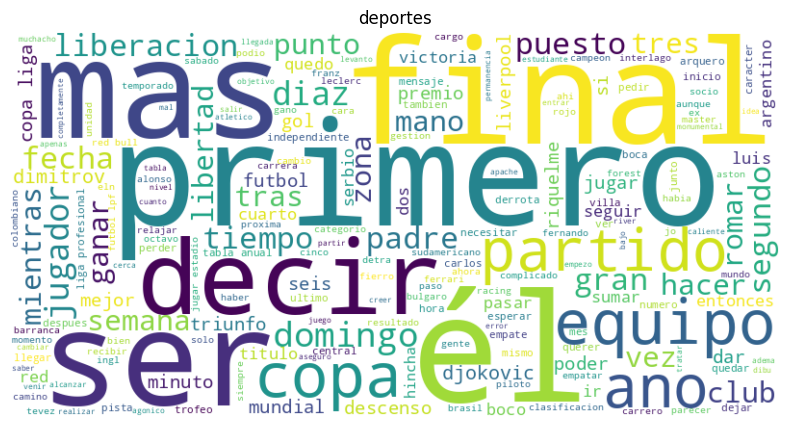

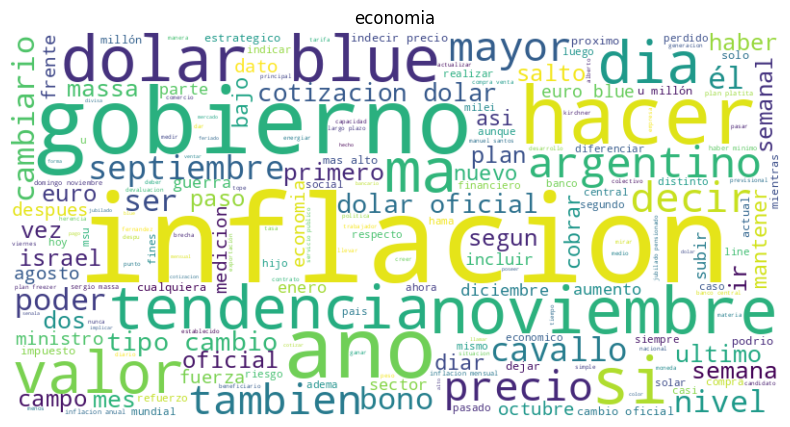

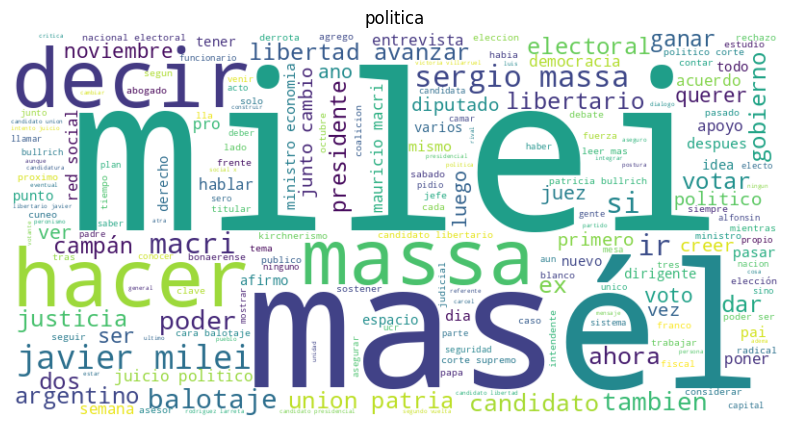

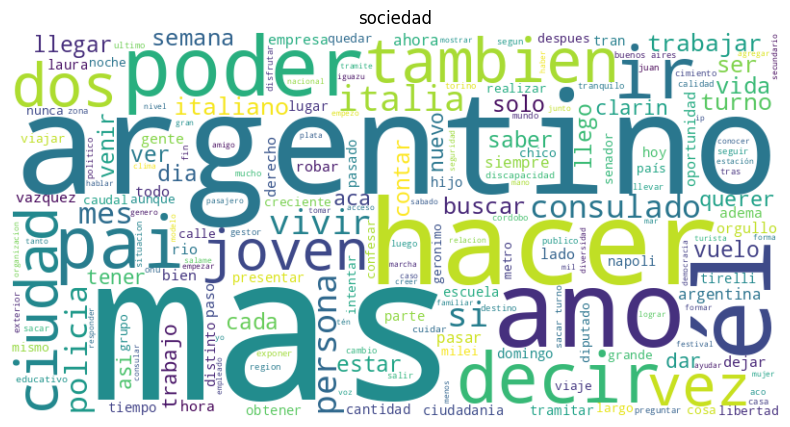

In [66]:
# Agrupa las noticias por tema
grupos_temas = texto_agrupado.groupby('tema')

for tema, grupo in grupos_temas:
    text = " ".join(grupo['noticia2'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Muestra la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(tema)
    plt.axis("off")
    plt.show()

## Ejercicio 4. Evaluación de similitudes

In [67]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=15fa0719f6c0dbf1c63e2644cfc5d5d1d8de01a96237464f25a21e8673a2ad44
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [68]:
from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable
# Cargamos el modelo preentrenado multilingüe
modelo = SentenceTransformer('distiluse-base-multilingual-cased-v1')

In [69]:
texto = texto_lematizado[['tema', 'título']]

In [70]:
texto.sample(10)

,tema,título
32,deportes,racing vs central cordoba sde por la copa de l...
27,sociedad,tierra de nadie ladrones en bicicleta y un bla...
22,sociedad,un avion de aerolineas argentinas tuvo un desp...
36,deportes,union de santa fe vs lanus por la copa de la l...
16,politica,elecciones 2023 en vivo sergio massa volvio a ...
35,deportes,libertad para papa el colombiano luis diaz pid...
2,economia,dolar blue hoy a cuanto cotiza este domingo 05...
3,economia,israel debe destruir a hamas para sobrevivir
5,economia,santos uribelarrea una infancia en el palacio ...
29,sociedad,la noche de los cimientos bajo el lema jovenes...


In [71]:
titulos_por_tema = {}
grupos_temas = texto.groupby('tema')

# Recorrer los grupos y obtener los 10 títulos de cada tema
for tema, grupo in grupos_temas:
    titulos = grupo['título'].tolist()[:10]  # Obtener los primeros 10 títulos de cada grupo
    titulos_por_tema[tema] = titulos

# Imprimir el diccionario
print(titulos_por_tema)

{'deportes': ['carlos tevez cuando yo agarre este fierro caliente nadie se queria hacer cargo de independiente', 'dibu martinez estreno su premio lev yashin con un gol insolito y aparecieron sus detractores el mejor arquero del mundo', 'racing vs central cordoba sde por la copa de la liga profesional minuto a minuto en directo', 'donde queda parado juan roman riquelme tras el golpe de la libertadores la decision sobre el dt el plantel y las elecciones', 'formula 1 max verstappen llego a 17 victorias en el gp de brasil y la genial maniobra de alonso para subirse al podio', 'libertad para papa el colombiano luis diaz pidio por su padre secuestrado tras hacer un gol en la premier league', 'union de santa fe vs lanus por la copa de la liga profesional minuto a minuto en directo', 'velez vs talleres de cordoba por la copa de la liga profesional minuto a minuto en directo', 'el increible abandono de charles leclerc en la vuelta previa de la formula 1 en brasil por que tengo tanta mala suerte

In [72]:
for key , value in titulos_por_tema.items():
  oraciones = value
  # Codificamos las oraciones
  embeddings = modelo.encode(oraciones, convert_to_tensor=True)
  # Calculamos las puntuaciones de similitud
  puntuaciones_coseno = util.cos_sim(embeddings, embeddings)
  # Encontramos las puntuaciones de similitud más altas
  pares = []
  for i in range(len(puntuaciones_coseno)-1):
    for j in range(i+1, len(puntuaciones_coseno)):
      pares.append({'index': [i, j], 'score': puntuaciones_coseno[i][j]})
  # Ordenamos las puntuaciones en orden decreciente
  pares = sorted(pares, key=lambda x: x['score'], reverse=True)
  # Creamos una tabla para mostrar los resultados
  tabla = PrettyTable()
  tabla.field_names = ["Oración 1", "Oración 2", "Puntuación de Similitud"]
  # Añadimos las filas a la tabla
  for par in pares[0:10]:
    i, j = par['index']
    tabla.add_row([oraciones[i], oraciones[j], f"{par['score']:.4f}"])
  # Mostramos la tabla
  print(f"Tema: {key} \n {tabla}")

Tema: deportes 
 +-------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|                                                        Oración 1                                                        |                                                          Oración 2                                                           | Puntuación de Similitud |
+-------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|               racing vs central cordoba sde por la copa de la liga profesional minuto a minuto en directo               |                  velez vs ta

## Ejercicio 5. Resumen de noticias por categoría

In [73]:
import re
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [74]:
# Nombre del modelo que vamos a utilizar para el resumen
model_name = "csebuetnlp/mT5_multilingual_XLSum"

In [75]:
# Definimos una función para manejar y limpiar espacios en blanco y saltos de línea
WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

In [76]:
# Cargamos el tokenizador y el modelo del nombre especificado
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [77]:
def resumen(article_text):
# Convertimos el texto del artículo en IDs de entrada usando el tokenizador
  input_ids = tokenizer(
      [WHITESPACE_HANDLER(article_text)],
      return_tensors="pt",
      padding="max_length",
      truncation=True,
      max_length=512
  )["input_ids"]

  # Generamos el resumen usando el modelo
  output_ids = model.generate(
      input_ids=input_ids,
      max_length=84,
      no_repeat_ngram_size=2,
      num_beams=4
  )[0]

  # Decodificamos los IDs de salida para obtener el resumen en texto
  summary = tokenizer.decode(
      output_ids,
      skip_special_tokens=True,
      clean_up_tokenization_spaces=False
  )

  return summary

In [78]:
texto_resumen = noticias.copy()

In [79]:
texto_resumen.head()

,tema,título,enlace,noticia
0,economia,feriado bancario que operaciones no se podran ...,https://www.clarin.com/economia//economia/feri...,este lunes 6 de noviembre no abrira ninguna de...
1,economia,euro hoy a cuanto cotiza este domingo 05 de no...,https://www.clarin.com/economia//economia/euro...,el euro cotiza este domingo 05 de noviembre a ...
2,economia,dolar blue hoy a cuanto cotiza este domingo 05...,https://www.clarin.com/economia//economia/dola...,la cotizacion del dolar blue es de 905 para la...
3,economia,israel debe destruir a hamas para sobrevivir,https://www.clarin.com/economia//economia/isra...,despues del sabado 7 de octubre cuando hamas l...
4,economia,el lado oscuro del plan platita la inflacion q...,https://www.clarin.com/economia//economia/lado...,a dos semanas del balotaje el ministro candida...


### Resumen de las noticias de una categoría de ejemplo.

Script preliminar para realizar un resumen de las noticias pertenecientes a una categoría en particular, elegida con anterioridad por el usuario.

In [80]:
temas = ['economia', 'politica', 'sociedad', 'deportes']
tema_ejemplo = temas[0]
for indice , fila in texto_resumen.iterrows():
  if fila['tema'] == tema_ejemplo:
    cuerpo = fila['noticia']
    titulo = fila['título']
    summary = resumen(cuerpo)
    print(f'Título del Artículo:\n{titulo}\n')
    print(f'Resumen:\n{summary}\n')

Título del Artículo:
feriado bancario que operaciones no se podran hacer este lunes

Resumen:
Este lunes 6 de noviembre no abrira ninguna de las entidades financieras de todo el país por el dia del trabajador bancario aunque no se podra operar de forma presencial desde el martes 7 y 8 denoviembre que pasa con el dolar oficial.

Título del Artículo:
euro hoy a cuanto cotiza este domingo 05 de noviembre

Resumen:
Este domingo 5 de noviembre el euro oficial cotiza a 37546 para la compra y la venta por lo que se mantiene estable respecto al último informado con estos valores.

Título del Artículo:
dolar blue hoy a cuanto cotiza este domingo 05 de noviembre

Resumen:
La cotización del dolar blue cierra este domingo junto con la del oficial a las 15 horas de lunes y viernes en lo que va de noviembre de 2023

Título del Artículo:
israel debe destruir a hamas para sobrevivir

Resumen:
El conflicto entre israelíes y la comunidad chiita de hamas se ha convertido en un dilema estratégico que pued

### Programa interactivo

Versión actualizada del script anterior que devuelve un resumen de una cantidad de noticias correspondientes a una categoría, ambas seleccionadas por el usuario.

In [81]:
# Crear una lista de temas disponibles
temas = ['economia', 'politica', 'sociedad', 'deportes']

# Pedir al usuario que elija un tema
print("Temas disponibles:")
for i, tema in enumerate(temas):
    print(f"{i + 1}. {tema}")

tema_elegido = input("Elija un número de tema (1-4): ")
tema_elegido = temas[int(tema_elegido) - 1]

# Pedir al usuario que elija la cantidad de noticias
cantidad_noticias = input("Elija la cantidad de noticias a resumir (1-10): ")
cantidad_noticias = int(cantidad_noticias)

# Filtrar el DataFrame por tema
noticias_por_tema = texto_resumen[texto_resumen['tema'] == tema_elegido]

# Limitar la cantidad de noticias según la elección del usuario
noticias_para_resumir = noticias_por_tema.head(cantidad_noticias)


# # Resumir las noticias y mostrarlas
for indice, fila in noticias_para_resumir.iterrows():
    cuerpo = fila['noticia']
    titulo = fila['título']
    summary = resumen(cuerpo)
    print(f'Artículo:\n{titulo}\n')
    print(f'Resumen:\n{summary}\n')

Temas disponibles:
1. economia
2. politica
3. sociedad
4. deportes
Elija un número de tema (1-4): 4
Elija la cantidad de noticias a resumir (1-10): 3
Artículo:
carlos tevez cuando yo agarre este fierro caliente nadie se queria hacer cargo de independiente

Resumen:
cuando el equipo de izquierda independiente se volvió a convertirse en el primer favorito de la primera fase del torneo de fútbol argentino en lograr la permanencia en la Copa del Mundo de 2014 nadie se quería hacerlo.

Artículo:
dibu martinez estreno su premio lev yashin con un gol insolito y aparecieron sus detractores el mejor arquero del mundo

Resumen:
El argentino dibu martinez se convirtió en el mejor arquero del mundo desde que fue galardonado por la revista francesa football con el premio lev yashin que condecora al mejor portero del planeta.

Artículo:
racing vs central cordoba sde por la copa de la liga profesional minuto a minuto en directo

Resumen:
El racing club recibe este domingo a central crdoba de  Santiag